In [0]:
import pandas as pd
  

In [0]:
#sequence_file = open("sequences.txt","r")
#sequences_list = sequence_file.read().split('\n')
sequences_list = list(filter(None, sequences_list))
population_df = pd.DataFrame({'Protein_seq' : pd.Series(sequences_list).values})
demographic_loc_opt = ['asia', 'africa', 'europe', 'latin america', 'north america', 'oceania']
demographic_loc_dist = [0.594, 0.171, 0.096, 0.085, 0.048, 0.005]
from random import choices
demographic_loc_list = list()
for count in range(0,len(sequences_list)):
    demographic_loc_list.append(choices(demographic_loc_opt,demographic_loc_dist).pop())
population_df['Demographic_loc'] = demographic_loc_list
population_df['Parents'] = None

In [0]:
#Initial population
print(population_df.info())
print(population_df.head())
population_df['Demographic_loc'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
Protein_seq        2000 non-null object
Demographic_loc    2000 non-null object
Parents            0 non-null object
dtypes: object(3)
memory usage: 47.0+ KB
None
                                         Protein_seq Demographic_loc Parents
0  CCGAGGGCTATGGTTTGGAAGTTAGAACCCTGGGGCTTCTCGCGGA...            asia    None
1  GAGTTTATATGGCGCGAGCCTAGTGGTTTTTGTACTTGTTTGTCGC...            asia    None
2  GATCAGTAGGGAAACAAACAGAGGGCCCAGCCACATCTAGCAGGTA...            asia    None
3  GTCCACGACCGAACTCCCACCTTGACCGCAGAGGTACCACCAGAGC...          europe    None
4  GGCGACCGAACTCCAACTAGAACCTGCATAACTGGCCTGGGAGATA...            asia    None


array(['asia', 'europe', 'north america', 'africa', 'latin america',
       'oceania'], dtype=object)

In [0]:
!pip install biopython

     |████████████████████████████████| 2.2MB 2.8MB/s 


In [0]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

X = population_df['Protein_seq'].tolist()[0]
Y = population_df['Protein_seq'].tolist()[1]

alignments = pairwise2.align.globalms(X, Y, 2, -1, -0.5, -0.1)
print(alignments)

[('CCGAG-------GG-------CTA-TGGTTTGGAAGTTAG-AACCCT-GGGGCTTC--TCGCG--GACACC', '--GAGTTTATATGGCGCGAGCCTAGTGGTTT-----TT-GTA---CTTG----TT-TGTCGCGTCG-----', 48.19999999999998, 0, 71), ('CCGAG-------GGC-------TA-TGGTTTGGAAGTTAG-AACCCT-GGGGCTTC--TCGCG--GACACC', '--GAGTTTATATGGCGCGAGCCTAGTGGTTT-----TT-GTA---CTTG----TT-TGTCGCGTCG-----', 48.19999999999998, 0, 71), ('CCGAG-------GG-------CTA-TGGTTTGGAAGTTAG-AACCC-TGGGGCTTC--TCGCG--GACACC', '--GAGTTTATATGGCGCGAGCCTAGTGGTTT-----TT-GTA---CTTG----TT-TGTCGCGTCG-----', 48.19999999999998, 0, 71), ('CCGAG-------GGC-------TA-TGGTTTGGAAGTTAG-AACCC-TGGGGCTTC--TCGCG--GACACC', '--GAGTTTATATGGCGCGAGCCTAGTGGTTT-----TT-GTA---CTTG----TT-TGTCGCGTCG-----', 48.19999999999998, 0, 71), ('CCGAG-------GG-------CTA-TGGTTTGGAAGTTAG-AACCCT-GGGGCTTCT--CGCG--GACACC', '--GAGTTTATATGGCGCGAGCCTAGTGGTTT-----TT-GTA---CTTG----TT-TGTCGCGTCG-----', 48.19999999999998, 0, 71), ('CCGAG-------GGC-------TA-TGGTTTGGAAGTTAG-AACCCT-GGGGCTTCT--CGCG--GACACC', '--GAGTTTATATGGCGCGAGCCTAGTGGTTT-

In [0]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# The LabelEncoder encodes a sequence of bases as a sequence of integers.
integer_encoder = LabelEncoder()  
# The OneHotEncoder converts an array of integers to a sparse matrix where 
# each row corresponds to one possible value of each feature.
one_hot_encoder = OneHotEncoder(categories='auto')   
input_features = []

for sequence in sequences_list:
  integer_encoded = integer_encoder.fit_transform(list(sequence))
  integer_encoded = np.array(integer_encoded).reshape(-1, 1)
  one_hot_encoded = one_hot_encoder.fit_transform(integer_encoded)
  input_features.append(one_hot_encoded.toarray())

print(sequences_list[0])
np.set_printoptions(threshold=40)
input_features = np.stack(input_features)
print("Example sequence\n-----------------------")
print('DNA Sequence #1:\n',sequences_list[0][:10],'...',sequences_list[0][-10:])
print('One hot encoding of Sequence #1:\n',input_features[2].T)

CCGAGGGCTATGGTTTGGAAGTTAGAACCCTGGGGCTTCTCGCGGACACC
Example sequence
-----------------------
DNA Sequence #1:
 CCGAGGGCTA ... CGCGGACACC
One hot encoding of Sequence #1:
 [[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]]


In [0]:

labels = requests.get(LABELS_URL).text.split('\n')
labels = list(filter(None, labels))
population_df['Labels'] = labels
one_hot_encoder = OneHotEncoder(categories='auto')
labels = np.array(labels).reshape(-1, 1)
input_labels = one_hot_encoder.fit_transform(labels).toarray()

print('Labels:\n',labels.T)
print('One-hot encoded labels:\n',input_labels.T)

Labels:
 [['0' '0' '0' ... '0' '1' '1']]
One-hot encoded labels:
 [[1. 1. 1. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]]


In [0]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(
    input_features, input_labels, test_size=0.25, random_state=42)

In [0]:
print(test_features)

[[[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  ...
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]]

 [[0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [1. 0. 0. 0.]
  ...
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  ...
  [0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [1. 0. 0. 0.]]

 ...

 [[1. 0. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 0. 1. 0.]
  [1. 0. 0. 0.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [1. 0. 0. 0.]
  [0. 0. 0. 1.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [1. 0. 0. 0.]
  ...
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]]


In [0]:
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=12, 
                 input_shape=(train_features.shape[1], 4)))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['binary_accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 39, 32)            1568      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 9, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                4624      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 34        
Total params: 6,226
Trainable params: 6,226
Non-trainable params: 0
_________________________________________________________________


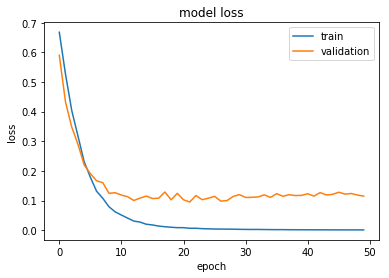

In [0]:
import matplotlib.pyplot as plt
history = model.fit(train_features, train_labels, 
                    epochs=50, verbose=0, validation_split=0.25)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

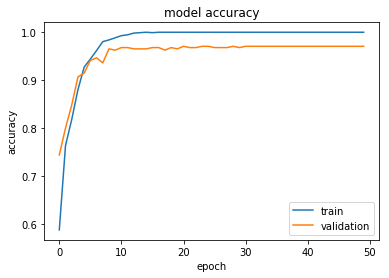

In [0]:
plt.figure()
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [0]:
import itertools

def child_seq(parent_seq, proteins, mutations):
    for locs in itertools.combinations(range(len(parent_seq)), mutations):
        this_parent_seq = [[gene] for gene in parent_seq]
        for loc in locs:
            orig_gene = parent_seq[loc]
            this_parent_seq[loc] = [l for l in proteins if l != orig_gene]
        for poss in itertools.product(*this_parent_seq):
            yield ''.join(poss)

import random

def mutate_v1(dna):
    dna_list = list(dna)
    mutation_site = random.randint(0, len(dna_list) - 1)
    dna_list[mutation_site] = random.choice(list('ATCG'))
    return ''.join(dna_list)
def get_base_frequencies_v2(dna):
        return {base: dna.count(base)/float(len(dna))
                for base in 'ATGC'}
def format_frequencies(frequencies):
    return ', '.join(['%s: %.2f' % (base, frequencies[base])
                      for base in frequencies])

In [0]:
child_df = pd.DataFrame()
for index, row in population_df.iterrows():
    dna = row['Protein_seq']
    nmutations = 10000
    for i in range(nmutations):
        dna = mutate_v1(dna)
    demographic_loc_opt = ['asia', 'africa', 'europe', 'latin america', 'north america', 'oceania']
    demographic_loc_dist = [0.594, 0.171, 0.096, 0.085, 0.048, 0.005]
    demographic_loc = choices(demographic_loc_opt,demographic_loc_dist).pop()
    child_df = child_df.append({'Protein_seq': dna, 'Demographic_loc':demographic_loc, 'Parents':index}, ignore_index=True)
predicted_labels = model.predict(np.stack(child_df['Protein_seq'].tolist()))
child_df['Labels'] = predicted_labels





ValueError: ignored

In [0]:
population_df.append(child_df, ignore_index = True)


In [0]:
for index, row in population_df.iterrows():
  if index >1999:
    population_

SyntaxError: ignored

Confusion matrix:
 [[248  11]
 [  0 241]]


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


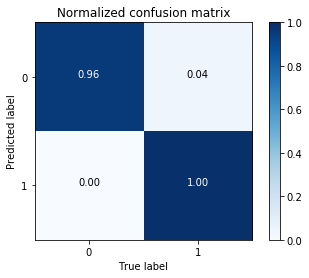

In [0]:
from sklearn.metrics import confusion_matrix
import itertools

predicted_labels = model.predict(np.stack(test_features))
cm = confusion_matrix(np.argmax(test_labels, axis=1), 
                      np.argmax(predicted_labels, axis=1))
print('Confusion matrix:\n',cm)

cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Normalized confusion matrix')
plt.colorbar()
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.xticks([0, 1]); plt.yticks([0, 1])
plt.grid('off')
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
             horizontalalignment='center',
             color='white' if cm[i, j] > 0.5 else 'black')

In [0]:
import tensorflow.keras.backend as K

def compute_salient_bases(model, x):
  input_tensors = [model.input]
  gradients = model.optimizer.get_gradients(model.output[0][1], model.input)
  compute_gradients = K.function(inputs = input_tensors, outputs = gradients)
  
  x_value = np.expand_dims(x, axis=0)
  gradients = compute_gradients([x_value])[0][0]
  sal = np.clip(np.sum(np.multiply(gradients,x), axis=1),a_min=0, a_max=None)
  return sal

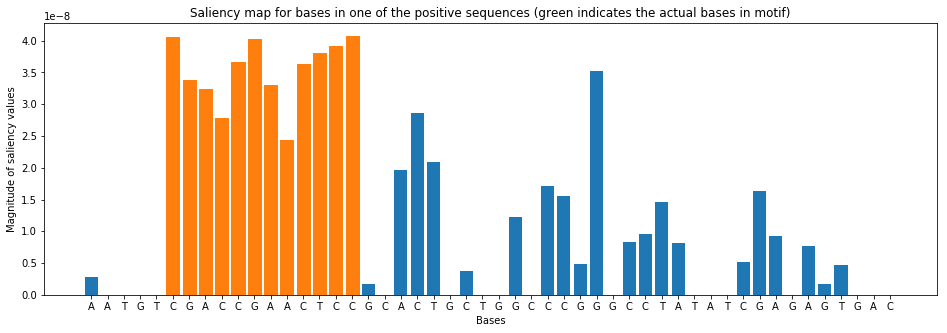

In [0]:
sequence_index = 1999  # You can change this to compute the gradient for a different example. But if so, change the coloring below as well.
sal = compute_salient_bases(model, input_features[sequence_index])

plt.figure(figsize=[16,5])
barlist = plt.bar(np.arange(len(sal)), sal)
[barlist[i].set_color('C1') for i in range(5,17)]  # Change the coloring here if you change the sequence index.
plt.xlabel('Bases')
plt.ylabel('Magnitude of saliency values')
plt.xticks(np.arange(len(sal)), list(sequences_list[sequence_index]));
plt.title('Saliency map for bases in one of the positive sequences'
          ' (green indicates the actual bases in motif)');

In [0]:
len(population_df.Protein_seq.tolist()[0])

50

In [0]:
import itertools

def child_seq(parent_seq, proteins, mutations):
    for locs in itertools.combinations(range(len(parent_seq)), mutations):
        this_parent_seq = [[gene] for gene in parent_seq]
        for loc in locs:
            orig_gene = parent_seq[loc]
            this_parent_seq[loc] = [l for l in proteins if l != orig_gene]
        for poss in itertools.product(*this_parent_seq):
            yield ''.join(poss)

In [0]:
import random

def mutate_v1(dna):
    dna_list = list(dna)
    mutation_site = random.randint(0, len(dna_list) - 1)
    dna_list[mutation_site] = random.choice(list('ATCG'))
    return ''.join(dna_list)

In [0]:
def get_base_frequencies_v2(dna):
        return {base: dna.count(base)/float(len(dna))
                for base in 'ATGC'}
def format_frequencies(frequencies):
    return ', '.join(['%s: %.2f' % (base, frequencies[base])
                      for base in frequencies])

In [0]:
dna = population_df['Protein_seq'].tolist()[0]
print('Starting DNA:', dna)
print(format_frequencies(get_base_frequencies_v2(dna)))

nmutations = 10000
for i in range(nmutations):
    dna = mutate_v1(dna)

print('DNA after %d mutations:' % nmutations, dna)
print(format_frequencies(get_base_frequencies_v2(dna)))

Starting DNA: CCGAGGGCTATGGTTTGGAAGTTAGAACCCTGGGGCTTCTCGCGGACACC
A: 0.18, T: 0.22, G: 0.34, C: 0.26
DNA after 10000 mutations: ACTTATGCCGCTCTCAAGCCGGATGGATGCGAGAGGGCCTGACCTGGAAA
A: 0.24, T: 0.18, G: 0.32, C: 0.26
